# HEATMAP PLOT

A *heatmap* is a graphical representation of data where individual values are represented as colors. It provides a visual way to display the intensity of values in a matrix, making it easy to identify patterns, trends, or anomalies in the data. Typically, the rows represent one set of variables (like samples or time points), and the columns represent another set (like features or treatments). The color scale is used to represent the range of values, with different colors indicating higher or lower intensity. Heatmaps are commonly used in fields such as biology, finance, and data analysis to visualize complex datasets.

## The first heatmap helps demonstrate the impact of applying a logarithmic transformation to the data, offering an educational perspective on how data statistic distribution works.

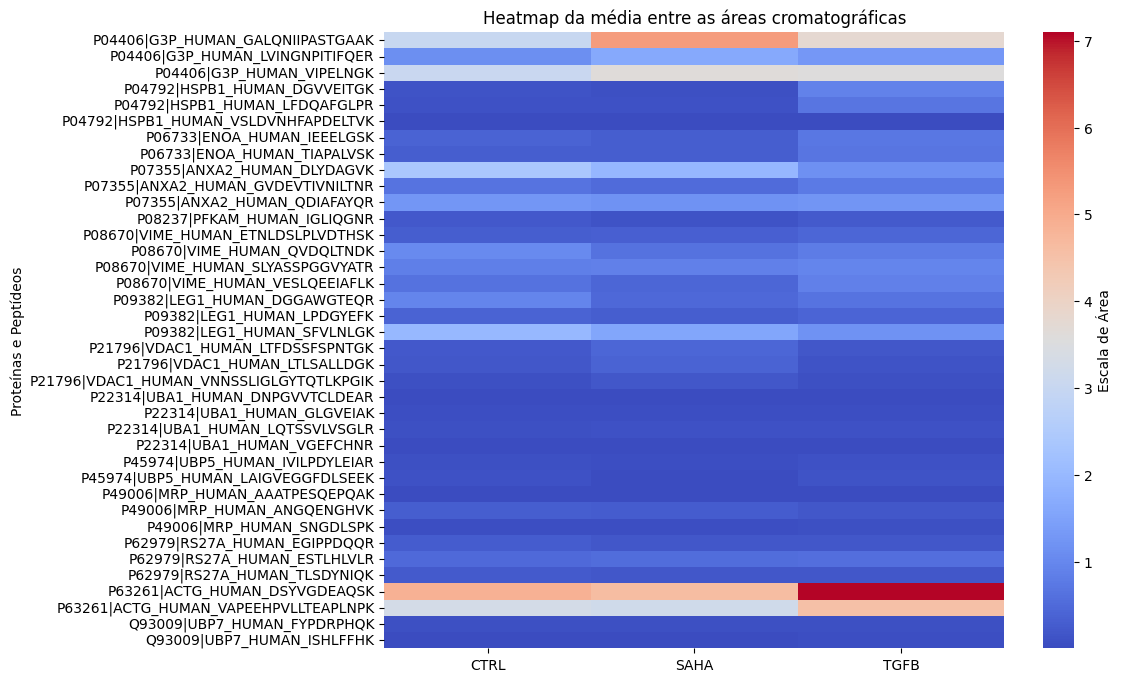

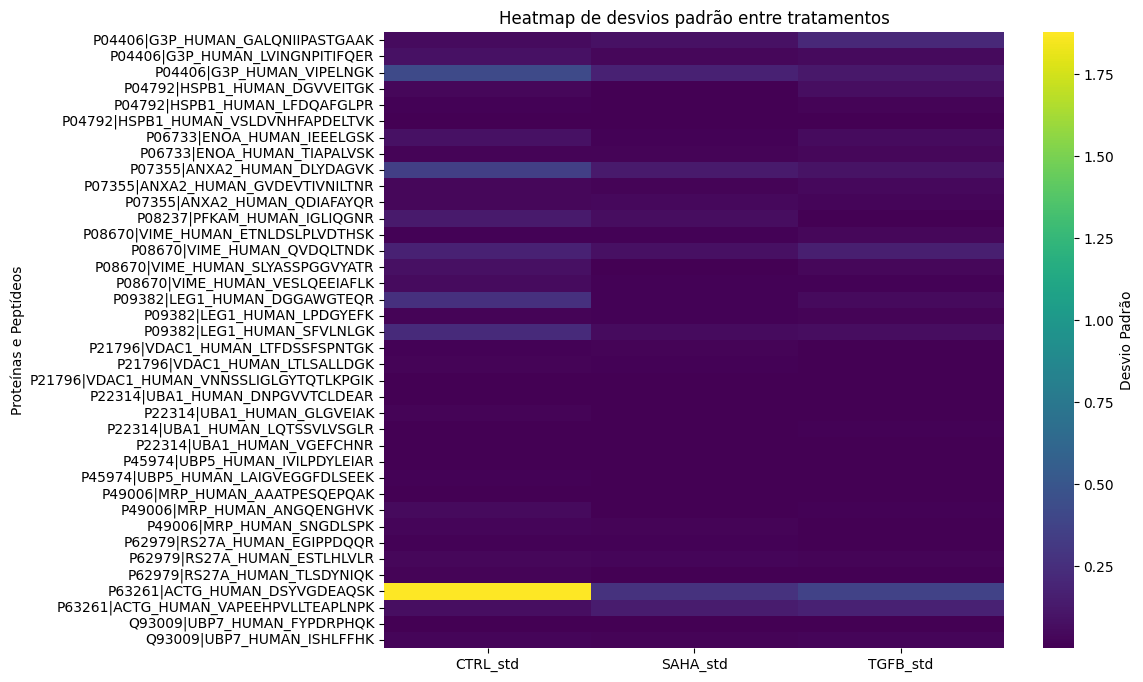

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas sejam colocadas corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Renomear o índice de 'Protein_Peptide' para o novo nome desejado
df.rename_axis('Proteínas e Peptídeos', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Calcular a média e o desvio padrão para cada tratamento
df['CTRL'] = df[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df['CTRL_std'] = df[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df['SAHA'] = df[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df['SAHA_std'] = df[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df['TGFB'] = df[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df['TGFB_std'] = df[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Selecionar apenas as colunas de médias para o heatmap
heatmap_data_means = df[['CTRL', 'SAHA', 'TGFB']].dropna()

# Plotar heatmap das médias
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_means, annot=False, cmap='coolwarm', cbar_kws={'label': 'Escala de Área'})
plt.title('Heatmap da média entre as áreas cromatográficas')
plt.show()

# Opcional: Plotar heatmap do desvio padrão para entender a variabilidade
heatmap_data_std = df[['CTRL_std', 'SAHA_std', 'TGFB_std']].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_std, annot=False, cmap='viridis', cbar_kws={'label': 'Desvio Padrão'})
plt.title('Heatmap de desvios padrão entre tratamentos')
plt.show()

# NÃO USE ESSE HEATMAP, É APENAS EDUCATIVO :)
# MANTIVE ESSE CÓDIGO SÓ PARA VCS VEREM QUE PRECISA DA ESCALA LOG MESMO PARA NORMALIZAR AS DISTRIBUIÇÕES!!!! 


# HEATMAP LOG APLICATION

For more explanations about log return to QQ-plot log.

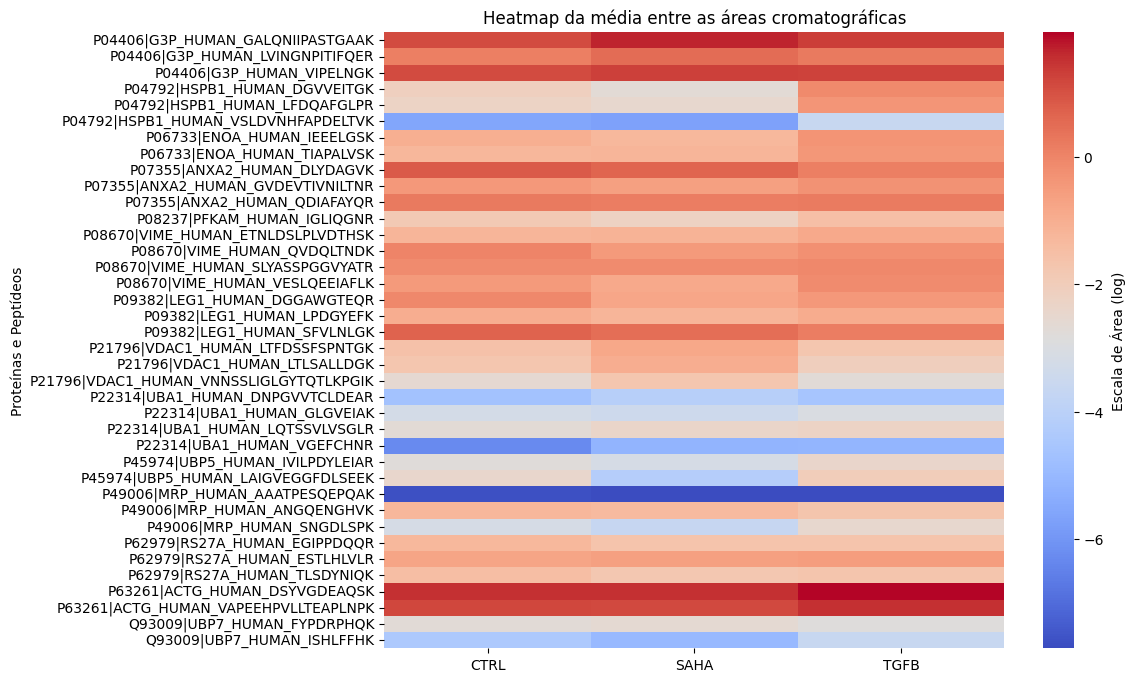

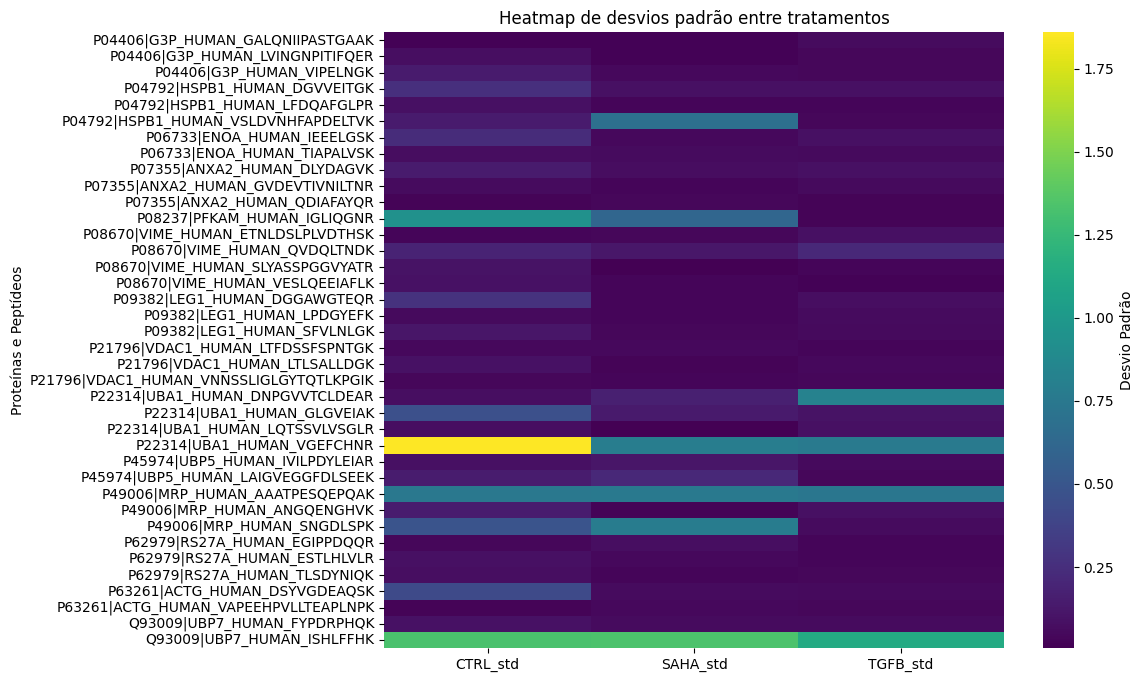

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados do CSV
file_path = 'Data/AreasRelatorioNorm.csv'
df = pd.read_csv(file_path, header=0)

# Garantir que as proteínas sejam colocadas corretamente como índice
df.set_index('Protein_Peptide', inplace=True)

# Renomear o índice de 'Protein_Peptide' para o novo nome desejado
df.rename_axis('Proteínas e Peptídeos', inplace=True)

# Converter todos os dados para valores numéricos, se possível
df = df.apply(pd.to_numeric, errors='coerce')

# Aplicar a transformação logarítmica, ignorando valores não positivos
df_log = np.log(df[df > 0])

# Calcular a média e o desvio padrão para cada tratamento
df_log['CTRL'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].mean(axis=1)
df_log['CTRL_std'] = df_log[['CTRL_A549_1', 'CTRL_A549_2', 'CTRL_A549_3']].std(axis=1)

df_log['SAHA'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].mean(axis=1)
df_log['SAHA_std'] = df_log[['SAHA_A549_1', 'SAHA_A549_2', 'SAHA_A549_3']].std(axis=1)

df_log['TGFB'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].mean(axis=1)
df_log['TGFB_std'] = df_log[['TGFB_A549_1', 'TGFB_A549_2', 'TGFB_A549_3']].std(axis=1)

# Selecionar apenas as colunas de médias para o heatmap
heatmap_data_means = df_log[['CTRL', 'SAHA', 'TGFB']].dropna()

# Plotar heatmap das médias
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_means, annot=False, cmap='coolwarm', cbar_kws={'label': 'Escala de Área (log)'})
plt.title('Heatmap da média entre as áreas cromatográficas')
plt.show()

# Opcional: Plotar heatmap do desvio padrão para entender a variabilidade
heatmap_data_std = df_log[['CTRL_std', 'SAHA_std', 'TGFB_std']].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_std, annot=False, cmap='viridis', cbar_kws={'label': 'Desvio Padrão'})
plt.title('Heatmap de desvios padrão entre tratamentos')
plt.show()
